### What is MLPs ?
+ MultiProtocol Label Switching (MPLS) là một kỹ thuật để tăng tốc kết nối mạng được phát triển lần đầu vào những năm 1990. Internet công cộng hoạt động bằng cách chuyển tiếp các packet từ router này sang router khác đến khi các packet đến đích. Mặt khác, MPLS gửi các packet theo các đường dẫn mạng được xác định trước. Kết quả là các router tốn ít thời gian hơn để quyến định nơi chuyển tiếp từng packet và các packet luôn đi theo cùng một đường dẫn.
+ Thay vì xác định thị trấn và thành phố nào người ta phải lái xe để đến đích, việc xác định các con đường đi đúng hướng sẽ hiệu quả hơn. Tương tự, MPLS xác định các đường dẫn – “đường” mạng – chứ không phải một loạt các điểm đến trung gian.

In [28]:
import os
import matplotlib.pyplot as plt

IMAGES_PATH = "/home/tuandinh/Desktop/AI and Machine Learning/Deep Learninig/images"

def save_img(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [1]:
from keras.datasets import fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

Let's take a look at a sample of the images in the dataset:

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Saving figure fashion_mnist_plot


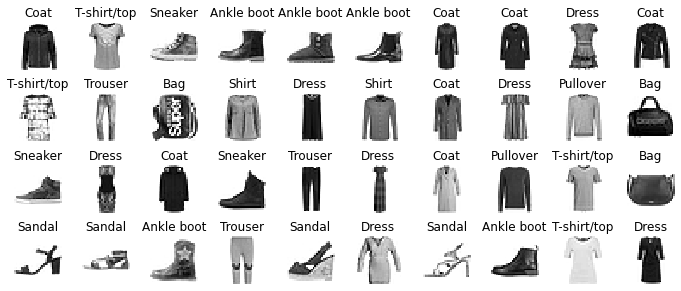

In [29]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_img('fashion_mnist_plot', tight_layout=False)
plt.show()

In [12]:
class_names[y_train[0]]

'Coat'

In [15]:
import keras
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.layers

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


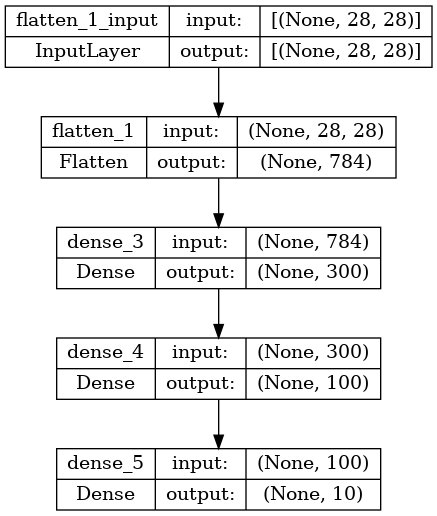

In [17]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


2022-08-07 14:35:56.324310: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.6993 - accuracy: 0.7689 - val_loss: 0.5055 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4834 - accuracy: 0.8307 - val_loss: 0.4454 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4420 - accuracy: 0.8458 - val_loss: 0.4335 - val_accuracy: 0.8436
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4156 - accuracy: 0.8539 - val_loss: 0.3972 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3954 - accuracy: 0.8616 - val_loss: 0.3902 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3783 - accuracy: 0.8657 - val_loss: 0.3766 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3647 - accuracy: 0.8700 - val_loss: 0.3611 - val_accuracy: 0.8740
Epo

In [20]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [25]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

Saving figure keras_learning_curves_plot


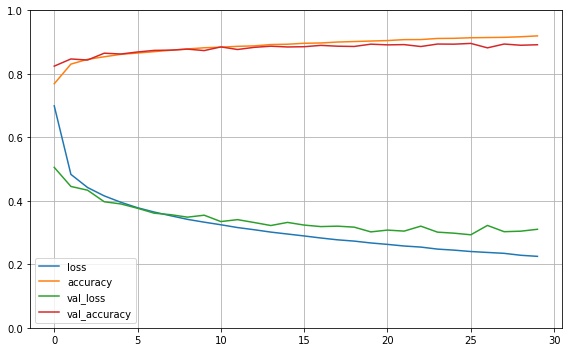

In [30]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_img("keras_learning_curves_plot")
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 84.3838 - accuracy: 0.8197


[84.38384246826172, 0.8197000026702881]